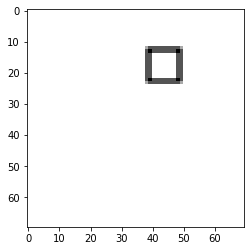

0


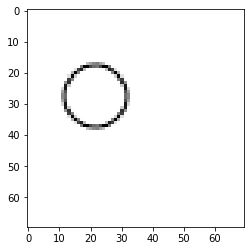

1


100%|██████████| 1000/1000 [00:05<00:00, 168.64it/s]


In [2]:

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import csv
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.transform import rotate
from keras.models import Sequential
from keras.layers import Dense


trainxs = []
trainximgs = []
trainys = []


DATADIR = r"C:\Users\colly\Desktop\squarevscircle"

CATEGORIES = ["square", "circle"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category) 
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        print(class_num)
          # we just want one for now so break
        break


for category in CATEGORIES:  

    path = os.path.join(DATADIR,category)  
    class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=notinsquare 1=insquare

    for img in tqdm(os.listdir(path)):  # iterate over each image per point value
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        new_img_array = rotate(img_array, 90)
        rot_image = cv2.resize(new_img_array, (50, 50)).flatten()
        new_img_array1 = rotate(img_array, 180)
        rot_image1 = cv2.resize(new_img_array1, (50, 50)).flatten()
        new_img_array2 = rotate(img_array, 270)
        rot_image2 = cv2.resize(new_img_array2, (50, 50)).flatten()
        image = cv2.resize(img_array, (50, 50)).flatten()
        trainxs.append(image)  # add this to our training_data
        trainys.append(class_num)
        trainxs.append(rot_image)  # add this to our training_data
        trainys.append(class_num)
        trainxs.append(rot_image1)  # add this to our training_data
        trainys.append(class_num)
        trainxs.append(rot_image2)  # add this to our training_data
        trainys.append(class_num)


In [145]:
len(trainximgs)

8000

In [4]:
trainxs = np.array(trainxs, dtype="float") / 255.0

trainys = np.array(trainys)
trainxs, trainys = shuffle(trainxs, trainys)

(trainX, testX, trainY, testY) = train_test_split(trainxs,trainys, test_size=0.1)



In [5]:
trainxs.shape

(8000, 2500)

In [6]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=10)
#Train the algorithm
neigh.fit(trainX, trainY)
# predict the response
pred = neigh.predict(testX)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(testY, pred))

KNeighbors accuracy score :  0.74375


In [7]:
# import the necessary packages
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import numpy as np
import argparse

 
# train the linear regression clasifier
print("[INFO] training Linear SVM classifier...")
model = LinearSVC()
model.fit(trainX, trainY)
 
# evaluate the classifier
print("[INFO] evaluating classifier...")
pred = model.predict(testX)
print ("svm accuracy score : ",accuracy_score(testY, pred))

[INFO] training Linear SVM classifier...
[INFO] evaluating classifier...
svm accuracy score :  0.51625
